In [ ]:
import numpy as np
import gym

# Create the Taxi-v3 environment
env = gym.make("Taxi-v3")

# Initialize the Q-table with zeros
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 10000
max_steps_per_episode = 100

# Q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    done = False

    for step in range(max_steps_per_episode):
        # Choose an action using epsilon-greedy policy
        epsilon = 0.1
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state, :])  # Exploit

        # Take the chosen action
        next_state, reward, done, _ = env.step(action)

        # Update the Q-table using the Q-learning update rule
        Q[state, action] = (1 - learning_rate) * Q[state, action] + \
                          learning_rate * (reward + discount_factor * np.max(Q[next_state, :]))

        state = next_state

        if done:
            break

# Evaluate the trained Q-table
num_eval_episodes = 100
total_rewards = 0

for _ in range(num_eval_episodes):
    state = env.reset()
    done = False

    while not done:
        action = np.argmax(Q[state, :])
        state, reward, done, _ = env.step(action)
        total_rewards += reward

average_reward = total_rewards / num_eval_episodes
print(f"Average Reward: {average_reward}")


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Average Reward: 7.9


Average Reward: 7.89


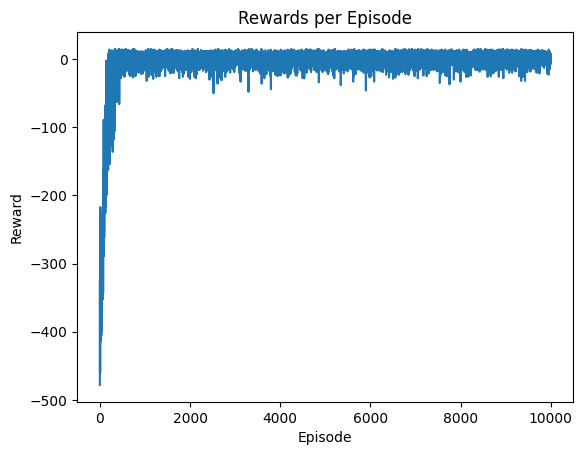

In [6]:
import numpy as np
import gym
import matplotlib.pyplot as plt

def q_learning(env, num_episodes=10000, max_steps_per_episode=100, learning_rate=0.8, discount_factor=0.70, epsilon=1.0, epsilon_decay=0.989, min_epsilon=0.1):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    Q = np.zeros((num_states, num_actions))

    rewards_all_episodes = []

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        rewards_current_episode = 0

        for step in range(max_steps_per_episode):
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(Q[state, :])  # Exploit

            next_state, reward, done, _ = env.step(action)

            Q[state, action] = (1 - learning_rate) * Q[state, action] + \
                               learning_rate * (reward + discount_factor * np.max(Q[next_state, :]))

            state = next_state
            rewards_current_episode += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards_all_episodes.append(rewards_current_episode)

    return Q, rewards_all_episodes

def evaluate_policy(env, Q, num_eval_episodes=100):
    total_rewards = 0

    for _ in range(num_eval_episodes):
        state = env.reset()
        done = False

        while not done:
            action = np.argmax(Q[state, :])
            state, reward, done, _ = env.step(action)
            total_rewards += reward

    average_reward = total_rewards / num_eval_episodes
    return average_reward

def plot_rewards(rewards, title="Rewards per Episode"):
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title(title)
    plt.show()

# Create the Taxi-v3 environment
env = gym.make("Taxi-v3")

# Train the Q-learning agent
Q, rewards_all_episodes = q_learning(env)

# Evaluate the trained Q-table
average_reward = evaluate_policy(env, Q)
print(f"Average Reward: {average_reward}")

# Plot the rewards
plot_rewards(rewards_all_episodes)
